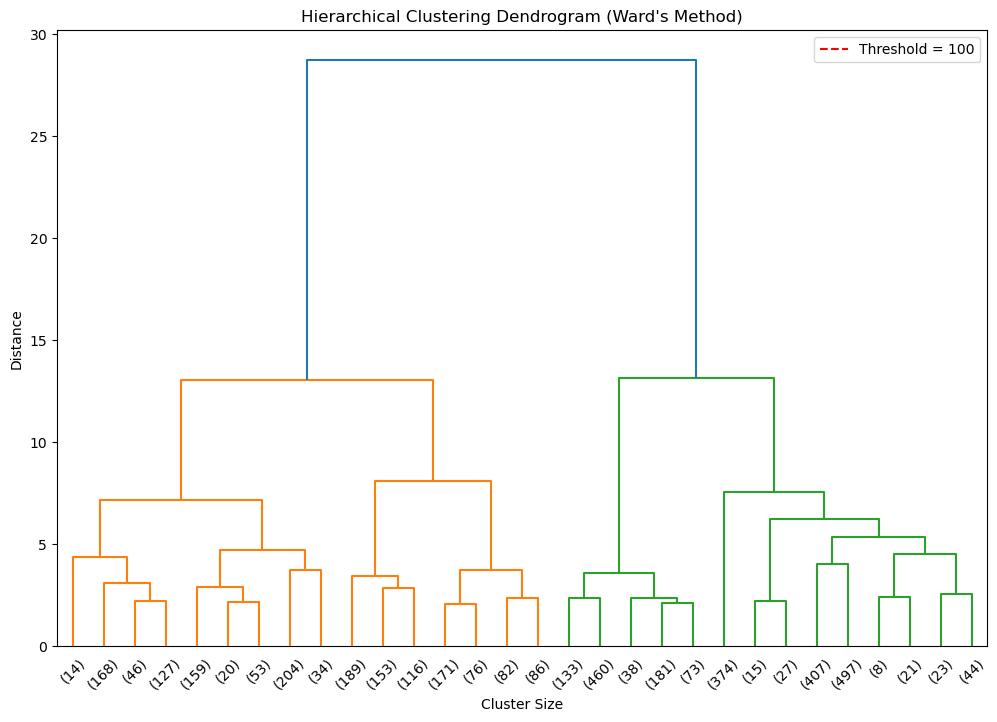

Number of clusters: 1


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('EastWestAirlinesCluster.csv')

# Drop non-relevant columns
data_for_clustering = data.drop(columns=["ID#", "Award?"])

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_for_clustering)

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(normalized_data, method='ward')

# Plot the dendrogram with a threshold of 100
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.axhline(y=100, color='r', linestyle='--', label='Threshold = 100')
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.legend()
plt.show()

# Get cluster labels using the specified threshold
clusters = fcluster(linkage_matrix, t=100, criterion='distance')
print(f"Number of clusters: {len(set(clusters))}")

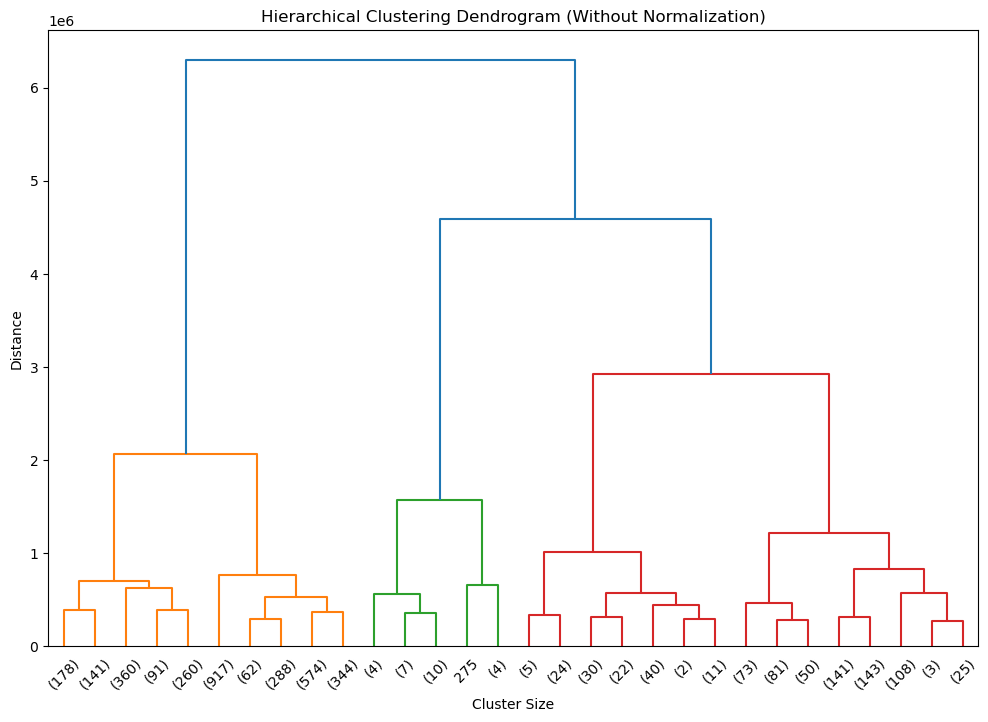

In [4]:
# Compare results with non-normalized data
linkage_matrix_unnormalized = linkage(data_for_clustering, method='ward')

# Plot dendrogram without normalization
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix_unnormalized, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram (Without Normalization)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [6]:
# Calculate centroids for each cluster
data["Cluster"] = clusters
centroids = data.groupby("Cluster").mean()

# Display centroids
print("Cluster Centroids:")
print(centroids)

# Assign labels to clusters (based on centroids)
cluster_labels = {
    1: "Minimal Flyers",
    2: "Frequent Flyers",
    3: "High Bonus Earners",
    # Add labels based on centroids
}
print("Cluster Labels:", cluster_labels)

Cluster Centroids:
                 ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                
1        2014.819455  73601.327582  144.114529   2.059515   1.014504   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
1         1.012253  17144.846212      11.6019         460.055764   

         Flight_trans_12  Days_since_enroll    Award?  
Cluster                                                
1               1.373593         4118.55939  0.370343  
Cluster Labels: {1: 'Minimal Flyers', 2: 'Frequent Flyers', 3: 'High Bonus Earners'}


In [8]:
import numpy as np

# Take a random 95% sample
sample_data = data.sample(frac=0.95, random_state=42)
normalized_sample = scaler.fit_transform(sample_data.drop(columns=["ID#", "Award?", "Cluster"]))

# Reapply hierarchical clustering
linkage_sample = linkage(normalized_sample, method='ward')
clusters_sample = fcluster(linkage_sample, t=100, criterion='distance')

# Compare clusters
print(f"Number of clusters in sampled data: {len(set(clusters_sample))}")

Number of clusters in sampled data: 1


In [10]:
from sklearn.cluster import KMeans

# Determine number of clusters from hierarchical clustering
k = len(set(clusters))  # Number of clusters from hierarchical

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(normalized_data)

# Compare K-Means clusters with hierarchical clusters
data["KMeans_Cluster"] = kmeans_clusters
print(data.groupby("KMeans_Cluster").mean())

                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2014.819455  73601.327582  144.114529   2.059515   1.014504   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.012253  17144.846212      11.6019         460.055764   

                Flight_trans_12  Days_since_enroll    Award?  Cluster  
KMeans_Cluster                                                         
0                      1.373593         4118.55939  0.370343      1.0  


In [12]:
# Analyze clusters to decide offers
for cluster in data["Cluster"].unique():
    cluster_data = data[data["Cluster"] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.describe())  # Summarize each cluster

# Example:
# Minimal Flyers -> Incentivize travel with bonus miles.
# Frequent Flyers -> Offer loyalty rewards.
# High Bonus Earners -> Offer premium membership discounts.


Cluster 1:
               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.